In [457]:
%load_ext autoreload
%autoreload 2

#%pylab notebook
%matplotlib inline
from pylab import *
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
rcParams["figure.facecolor"] = 'white'
rc('text.latex',preamble=r'\usepackage{/Users/sraghunathan/.configs/apjfonts}')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [458]:
rcParams['figure.dpi'] = 150

In [459]:
import sys, numpy as np, glob
sys.path.append('/Users/sraghunathan/Research/SPTPol/analysis/git/DRAFT/modules/')
import misc

In [460]:
#camb_file = 'data/output_planck_r_0.0_2015_cosmo_lensedCls.dat'

data_folder = '/Users/sraghunathan/Research/SPTPol/analysis/git/DRAFT/data/'
camb_file = '%s/output_planck_r_0.0_2015_cosmo_lensedCls.dat' %(data_folder)

Tcmb = 2.73
el_camb = np.loadtxt(camb_file, usecols = [0])
dl_camb = np.loadtxt(camb_file, usecols = [1,2,3,4])

cl_camb = ( Tcmb**2. * dl_camb * 2 * np.pi ) / ( el_camb[:,None] * (el_camb[:,None] + 1) )
cl_camb *= 1e12
cl_TT, cl_EE, cl_BB, cl_TE = cl_camb.T


In [461]:
#get all the files
results_folder = 'results/galactic_sims/'
searchstr = '%s/*AZ*.npy' %(results_folder)
flist_full = glob.glob(searchstr)
print(len(flist_full), flist_full)

19 ['results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_145_galmask3_AZ.npy', 'results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-145-225_galmask3_AZ.npy', 'results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-145-225-278_galmask2_AZ.npy', 'results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-145-225-278_galmask0_AZ.npy', 'results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_145-225-278_galmask3_noatmnoise_AZ.npy', 'results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-225-278_galmask3_noatmnoise_AZ.npy', 'results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-145-278_galmask3_noatmnoise_AZ.npy', 'results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-145-225_galmask3_noatmnoise_AZ.npy', 'results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-145-225-278_galmask3_AZ.npy', 'results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy0_93-145-225-278_AZ.npy', 'results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-145_galmask3_AZ.npy'

In [479]:
#select files to plot
if (0):
    reqd_fname_str = ['_galaxy0_93-145-225-278.npy', '_galaxy1_93-145-225-278_galmask3.npy']
    colorarr = ['k', 'darkred']
    plname_str = 'without_vs_with_galaxy_mask3_93-145-225-278'
    freqarr_for_noise = [93, 145]

if (0):
    reqd_fname_str = ['_galaxy0_145-225-278.npy', '_galaxy1_145-225-278_galmask3.npy']
    colorarr = ['k', 'darkred']
    plname_str = 'without_vs_with_galaxy_mask3_145-225-278'
    freqarr_for_noise = [145]

if (0):
    reqd_fname_str = ['_galaxy0_93-145-225-278_noatmnoise.npy', '_galaxy1_93-145-225-278_galmask3_noatmnoise.npy']
    colorarr = ['k', 'darkred']
    plname_str = 'without_vs_with_galaxy_mask3_93-145-225-278_noatmnoise'
    freqarr_for_noise = [145]

if (0):
    reqd_fname_str = ['_galaxy0_145-225-278_noatmnoise.npy', '_galaxy1_145-225-278_galmask3_noatmnoise.npy']
    colorarr = ['k', 'darkred']
    plname_str = 'without_vs_with_galaxy_mask3_145-225-278_noatmnoise'
    freqarr_for_noise = [145]

if (0):
    reqd_fname_str = ['_galaxy0_93-145-225-278.npy', '_galaxy1_93-145-225-278_galmask0.npy', \
                      '_galaxy1_93-145-225-278_galmask1.npy', '_galaxy1_93-145-225-278_galmask2.npy',\
                      '_galaxy1_93-145-225-278_galmask3.npy']
    colorarr = ['k', 'navy', 'green', 'goldenrod', 'darkred']
    plname_str = 'without_vs_with_galaxy_allmasks_93-145-225-278'
    freqarr_for_noise = [93, 145]

#reqd_fname_str = ['_galaxy0_145-225-278.npy', '_galaxy1_145-225-278_galmask3.npy']
gal_combs = [0, 1]
freqarr_combs_full = [[93, 145, 225, 278], [93, 225, 278], [145, 225, 278], [93, 145, 278], [93, 145, 225], [93, 145], [93], [145]]
gal_mask_combs_full = [3, 2, 1, 0]
atm_noise_combs = [1, 0]

colorarr_to_use = []
if (0):
    reqd_fname_str = []
    for freqarr in freqarr_combs_full[0:1]:
        freqarr_str = '-'.join(np.asarray(freqarr).astype(str))
        for gal in gal_combs:
            if not gal:
                gal_mask_combs = [gal_mask_combs_full[-1]]
            else:
                gal_mask_combs = np.copy(gal_mask_combs_full)
            for gal_mask in gal_mask_combs:
                if not gal:
                    curr_reqd_fname_str = '_galaxy%s_%s_AZ.npy' %(gal, freqarr_str)                    
                else:
                    curr_reqd_fname_str = '_galaxy%s_%s_galmask%s_AZ.npy' %(gal, freqarr_str, gal_mask)
                reqd_fname_str.append( curr_reqd_fname_str )
                
    reqd_fname_str = np.unique(reqd_fname_str)

    colorarr_to_use = ['k', 'navy', 'green', 'goldenrod', 'darkred']
    plname_str = 'without_vs_with_galaxy_allmasks_93-145-225-278'

    if (0):
        reqd_fname_str = [reqd_fname_str[0], reqd_fname_str[-1]]
        colorarr_to_use = ['k', 'darkred']
        plname_str = 'without_vs_with_galaxy_mask3_93-145-225-278'
        
    what_is_changing = 'mask'


if (1):
    reqd_fname_str = []
    for gal in gal_combs:
        if gal == 1:
            freqarr_combs = np.copy(freqarr_combs_full)[0:5]
        else:
            freqarr_combs = np.copy(freqarr_combs_full)[0:1]
        for freqarr in freqarr_combs:
            freqarr_str = '-'.join(np.asarray(freqarr).astype(str))
            gal_mask_combs = [3]
            for gal_mask in gal_mask_combs:
                if not gal:
                    curr_reqd_fname_str = '_galaxy%s_%s_AZ.npy' %(gal, freqarr_str)                    
                else:
                    curr_reqd_fname_str = '_galaxy%s_%s_galmask%s_AZ.npy' %(gal, freqarr_str, gal_mask)
                if curr_reqd_fname_str in reqd_fname_str: continue
                reqd_fname_str.append( curr_reqd_fname_str )
                
    plname_str = 'mask3_differentbands'

    what_is_changing = 'bands'

if (0):
    reqd_fname_str = []
    for gal in gal_combs:
        if gal == 1:
            freqarr_combs = np.copy(freqarr_combs_full)[0:5]
        else:
            freqarr_combs = np.copy(freqarr_combs_full)[0:1]
        for freqarr in freqarr_combs:
            freqarr_str = '-'.join(np.asarray(freqarr).astype(str))
            gal_mask_combs = [3]
            for gal_mask in gal_mask_combs:
                for atm_noise in atm_noise_combs[1:]:
                    if not gal:
                        curr_reqd_fname_str = '_galaxy%s_%s_AZ.npy' %(gal, freqarr_str)                    
                    else:
                        curr_reqd_fname_str = '_galaxy%s_%s_galmask%s_AZ.npy' %(gal, freqarr_str, gal_mask)
                    if atm_noise == 0:
                        curr_reqd_fname_str = curr_reqd_fname_str.replace('_AZ.npy', '_noatmnoise_AZ.npy')
                    if curr_reqd_fname_str in reqd_fname_str: continue
                    reqd_fname_str.append( curr_reqd_fname_str )
                
    #reqd_fname_str = np.unique(reqd_fname_str)

    plname_str = 'mask3_differentbands_nooverf'

    what_is_changing = 'bands'

if (0):
    reqd_fname_str = []
    for gal in gal_combs:
        if gal == 1:
            freqarr_combs = [\
                freqarr_combs_full[0], freqarr_combs_full[6], freqarr_combs_full[7], freqarr_combs_full[5],\
                freqarr_combs_full[1], freqarr_combs_full[2]
                            ]
        else:
            freqarr_combs = np.copy(freqarr_combs_full)[0:1]
        for freqarr in freqarr_combs:
            freqarr_str = '-'.join(np.asarray(freqarr).astype(str))
            gal_mask_combs = [3]
            for gal_mask in gal_mask_combs:
                if not gal:
                    curr_reqd_fname_str = '_galaxy%s_%s_AZ.npy' %(gal, freqarr_str)                    
                else:
                    curr_reqd_fname_str = '_galaxy%s_%s_galmask%s_AZ.npy' %(gal, freqarr_str, gal_mask)
                if curr_reqd_fname_str in reqd_fname_str: continue
                reqd_fname_str.append( curr_reqd_fname_str )
                
    plname_str = 'mask3_differentbands_part2'

    what_is_changing = 'bands'
#colorarr_full = [cm.set3(int(d)) for ]
#reqd_fname_str = np.unique(reqd_fname_str)
print(reqd_fname_str)


['_galaxy0_93-145-225-278_AZ.npy', '_galaxy1_93-145-225-278_galmask3_AZ.npy', '_galaxy1_93-225-278_galmask3_AZ.npy', '_galaxy1_145-225-278_galmask3_AZ.npy', '_galaxy1_93-145-278_galmask3_AZ.npy', '_galaxy1_93-145-225_galmask3_AZ.npy']


In [485]:
#get refined fnames
flist = []
colorarr = []
used_inds = []
for fname in sorted( flist_full ):
    passed = 0
    for rrr in reqd_fname_str:
        if fname.find(rrr)>-1:
            passed = 1
    if passed:
        flist.append(fname)
        if fname.find('_galaxy0_93-145-225-278')>-1:
            colorval = 'k'
        elif fname.find('_galaxy1_93-145-225-278_galmask3')>-1:
            colorval = 'darkred'
        else:
            cmap, totrand = cm.tab10, 10
            cmap, totrand = cm.Set2, 7
            #cmap, totrand = cm.Set3, 10
            randind = np.random.randint(totrand)
            while randind in used_inds:
                randind = np.random.randint(totrand)
            used_inds.append(randind)
            colorval = cmap(int(randind))
        
        colorarr.append(colorval)
try:
    if len(colorarr_to_use)>colorarr:
        colorarr = colorarr_to_use
except:
    pass
print(flist)

['results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy0_93-145-225-278_AZ.npy', 'results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_145-225-278_galmask3_AZ.npy', 'results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-145-225-278_galmask3_AZ.npy', 'results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-145-225_galmask3_AZ.npy', 'results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-145-278_galmask3_AZ.npy', 'results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-225-278_galmask3_AZ.npy']


In [486]:
'''
#get beam deconvolved noise nls
beam_noise_dic = np.load(flist[0], allow_pickle=1).item()['beam_noise_dic']
#print(beam_noise_dic)
elknee_dic = np.load(flist[0], allow_pickle=1).item()['elknee_dic']
param_dict = np.load(flist[0], allow_pickle=1).item()['param_dict']

corr_noise_bands = {20: [20], 27:[39], 39:[27], 93:[145], 145:[93], 225: [278], 278: [225]}
rho = 0.9
TParr = ['T', 'P']
el = np.arange(param_dict['lmax'])

nl_dic = {}
for TP in TParr:
    nl_dic[TP]={}
    for freq1 in freqarr_for_noise:
        beamval1, noiseval1 = beam_noise_dic[TP][freq1]
        #print(beamval1, noiseval1)
        elknee1, alphaknee1 = elknee_dic[TP][freq1]
        for freq2 in freqarr_for_noise:        
            beamval2, noiseval2 = beam_noise_dic[TP][freq2]
            elknee2, alphaknee2 = elknee_dic[TP][freq2]
            
            if freq1 == freq2:
                nl = misc.get_nl(noiseval1, el, beamval1, elknee = elknee1, alphaknee = alphaknee1)
            else:
                if freq2 in corr_noise_bands[freq1]:
                    nl = misc.get_nl(noiseval1, el, beamval1, elknee = elknee1, alphaknee = alphaknee1, \
                                     beamval2 = beamval2, noiseval2 = noiseval2, elknee2 = elknee2, alphaknee2 = alphaknee2, rho = rho)
                else:
                    nl = np.zeros( len(el) )
            
            #print(freq1, freq2, nl)
            nl[el<=param_dict['lmin']] = 0.
            ##nl[nl == 0.] = np.min(nl[nl!=0.])/1e3
            nl_dic[TP][(freq1, freq2)] = nl
print(nl_dic['T'].keys())
'''

"\n#get beam deconvolved noise nls\nbeam_noise_dic = np.load(flist[0], allow_pickle=1).item()['beam_noise_dic']\n#print(beam_noise_dic)\nelknee_dic = np.load(flist[0], allow_pickle=1).item()['elknee_dic']\nparam_dict = np.load(flist[0], allow_pickle=1).item()['param_dict']\n\ncorr_noise_bands = {20: [20], 27:[39], 39:[27], 93:[145], 145:[93], 225: [278], 278: [225]}\nrho = 0.9\nTParr = ['T', 'P']\nel = np.arange(param_dict['lmax'])\n\nnl_dic = {}\nfor TP in TParr:\n    nl_dic[TP]={}\n    for freq1 in freqarr_for_noise:\n        beamval1, noiseval1 = beam_noise_dic[TP][freq1]\n        #print(beamval1, noiseval1)\n        elknee1, alphaknee1 = elknee_dic[TP][freq1]\n        for freq2 in freqarr_for_noise:        \n            beamval2, noiseval2 = beam_noise_dic[TP][freq2]\n            elknee2, alphaknee2 = elknee_dic[TP][freq2]\n            \n            if freq1 == freq2:\n                nl = misc.get_nl(noiseval1, el, beamval1, elknee = elknee1, alphaknee = alphaknee1)\n            e

In [487]:
#for plots
fsval = 8
logscale = 1
xmin, xmax = 20, 4000


results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy0_93-145-225-278_AZ.npy
results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_145-225-278_galmask3_AZ.npy
results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-145-225-278_galmask3_AZ.npy
results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-145-225_galmask3_AZ.npy
results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-145-278_galmask3_AZ.npy
results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-225-278_galmask3_AZ.npy


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


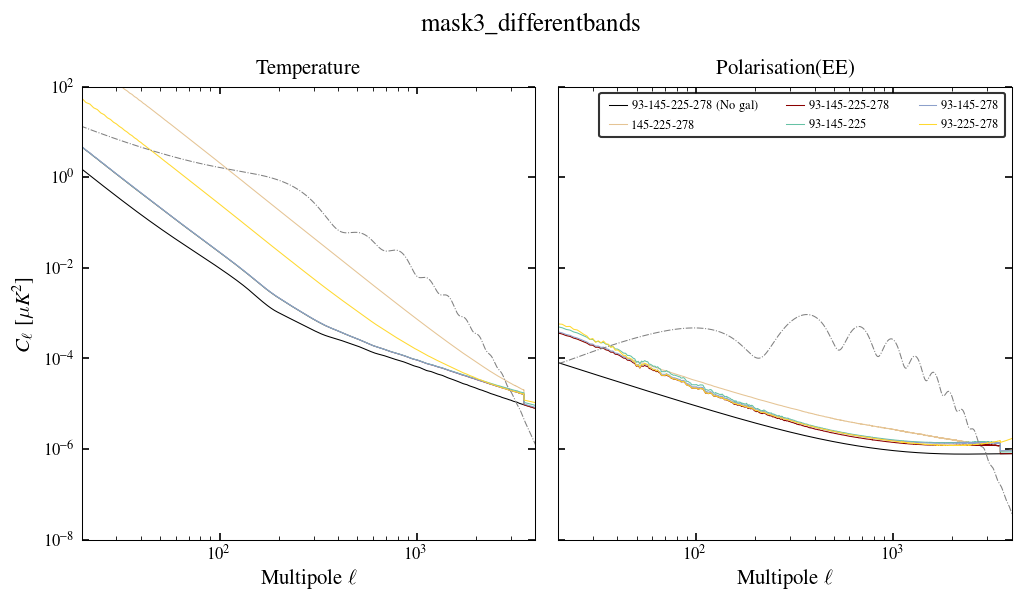

In [488]:
##### clf()
dic_for_snr = {}
fig = figure(figsize=(8., 4.))
subplots_adjust(wspace=0.05)
#colorarr =['k', 'navy', 'darkgreen', 'goldenrod', 'darkred']
for fcntr, fname in enumerate( flist ):
    dic_for_snr[fname] = {}
    print(fname)
    resdic = np.load(fname, allow_pickle=1).item()

    #get fksy
    fsky = resdic['fsky_val']

    #get frequencies from dic
    freqarr = list( resdic['beam_noise_dic']['T'].keys() )
    freqarr_str = '-'.join(np.asarray(freqarr).astype(str))

    if what_is_changing == 'mask':
        #lab = r'%sf$_{\rm sky}=%.2f$' %(lab, fsky)
        lab = r'f$_{\rm sky}=%.2f$' %(fsky)
    elif what_is_changing == 'bands':
        lab = r'%s' %(freqarr_str)

    if fname.find('galaxy0')>-1:
        lab = '%s (No gal)' %(lab)

    el = resdic['el']
    for tpcntr, TP in enumerate(TParr):
        if logscale:
            ax = subplot(1,2,tpcntr+1, yscale = 'log', xscale = 'log')
        else:
            ax = subplot(1,2,tpcntr+1, yscale = 'log')#, xscale = 'log')
        cl_res = resdic['cl_residual'][TP]
        plot(el, cl_res, label = lab, color = colorarr[fcntr], lw = 0.5)
        dic_for_snr[fname][TP] = [el, cl_res, fsky]

for tpcntr, TP in enumerate(TParr):
    if logscale:
        ax = subplot(1,2,tpcntr+1, yscale = 'log', xscale = 'log')
    else:
        ax = subplot(1,2,tpcntr+1, yscale = 'log')#, xscale = 'log')
    if TP == 'T':
        tit = r'Temperature'
        plot(el_camb, cl_TT, 'gray', ls = '-.', lw = 0.5)#, label = r'TT')
    elif TP == 'P':
        tit = r'Polarisation(EE)'
        plot(el_camb, cl_EE, 'gray', ls = '-.', lw = 0.5)#, label = r'EE')
    '''
    for nucntr, nu1nu2 in enumerate( nl_dic[TP] ):
        nu1, nu2 = nu1nu2
        if nu1 != nu2: continue
        plot(nl_dic[TP][nu1nu2], ls = '--', lw = 0.3, label = r'%s: Noise' %(nu1))
    '''
    if tpcntr == 1:
        legend(loc = 1, fontsize = 6, ncol = 3, handlelength = 2., handletextpad = 0.1)
    xlim(xmin, xmax); ylim(1e-8, 1e2)
    xlabel(r'Multipole $\ell$')
    if tpcntr == 0:
        ylabel(r'$C_{\ell}\ [\mu K^{2}]$')
    else:
        setp(ax.get_yticklabels(which = 'both'), visible=False)
    title(tit, fontsize = 10)
    for label in ax.get_xticklabels(): label.set_fontsize(fsval)
    for label in ax.get_yticklabels(): label.set_fontsize(fsval)        
suptitle(r'%s' %(plname_str.replace('_','\_')), y = 1.)
if logscale:
    savefig('reports/galactic_sims/ILC_analysis/ilc_%s_logscale.pdf' %(plname_str))
else:
    savefig('reports/galactic_sims/ILC_analysis/ilc_%s.pdf' %(plname_str))    

results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy0_93-145-225-278_AZ.npy
results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_145-225-278_galmask3_AZ.npy
results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-145-225-278_galmask3_AZ.npy
results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-145-225_galmask3_AZ.npy
results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-145-278_galmask3_AZ.npy
results/galactic_sims/S4_ilc_zonca_sims_20204028_galaxy1_93-225-278_galmask3_AZ.npy


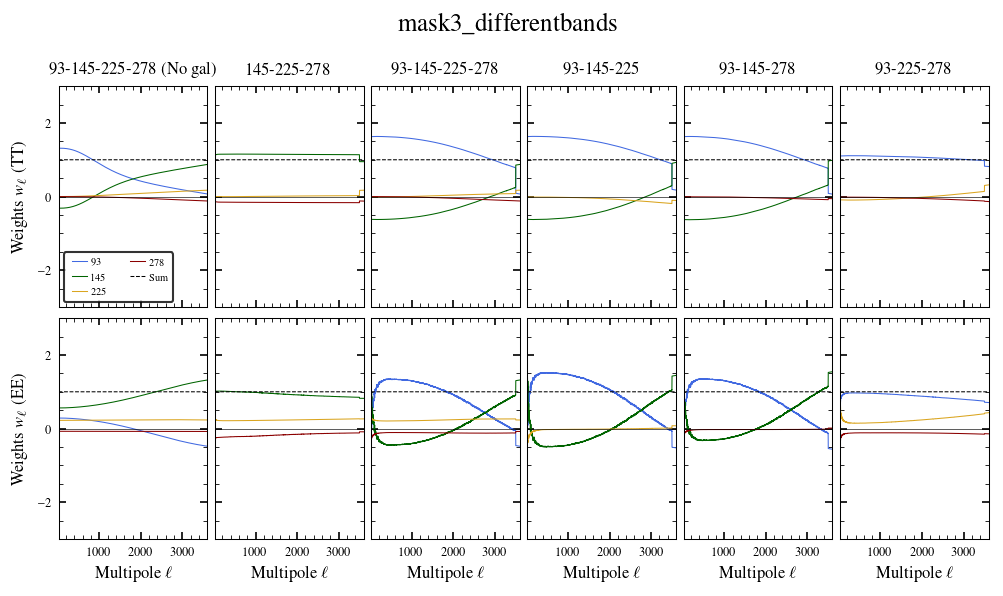

In [489]:
#plot weights
##### clf()
logscale = 0
fsval = 6
dic_for_snr = {}
fig = figure(figsize=(8., 4.))
subplots_adjust(wspace=0.05, hspace = 0.05)
colordic = {27:'indigo', 39:'blue', 93: 'royalblue', 145: 'darkgreen', 225: 'goldenrod', 278: 'darkred'}

tr, tc = 2, len(flist)
for fcntr, fname in enumerate( flist ):
    dic_for_snr[fname] = {}
    print(fname)
    resdic = np.load(fname, allow_pickle=1).item()

    #get fksy
    fsky = resdic['fsky_val']

    #get frequencies from dic
    freqarr = list( resdic['beam_noise_dic']['T'].keys() )
    freqarr_str = '-'.join(np.asarray(freqarr).astype(str))

    if what_is_changing == 'mask':
        #lab = r'%sf$_{\rm sky}=%.2f$' %(lab, fsky)
        lab = r'f$_{\rm sky}=%.2f$' %(fsky)
    elif what_is_changing == 'bands':
        lab = r'%s' %(freqarr_str)

    if fname.find('galaxy0')>-1:
        lab = '%s (No gal)' %(lab)
        
    #get weights from dic
    weights_dic = resdic['weights']
    
    for tpcntr, TP in enumerate(TParr):
        if logscale:
            ax = subplot2grid((tr,tc),(tpcntr,fcntr), xscale = 'log')#, yscale = 'log')
        else:
            ax = subplot2grid((tr,tc),(tpcntr,fcntr))#, xscale = 'log')#, yscale = 'log')

        for frqcntr, freq in enumerate( freqarr ):
            plot(weights_dic[TP][frqcntr], color = colordic[freq], label = r'%s' %(freq), lw = 0.5)
        plot(np.sum(weights_dic[TP], axis = 0), 'k--', label = r'Sum', lw = 0.5)
        axhline(lw=0.3);

        if fcntr == 0 and tpcntr == 0:
            if tc>2:
                ncol = 2
            else:
                ncol = 5
            legend(loc = 3, fontsize = 5, ncol = ncol, handlelength = 2., handletextpad = 0.1)
        xlim(20, 3600); ylim(-3., 3.)

        ylab = 'Weights $w_{\ell}$'
        if tpcntr == 0:
            ylab = r'%s (TT)' %(ylab)
            title(lab, fontsize = fsval + 2)
            setp(ax.get_xticklabels(which = 'both'), visible=False)
        else:
            xlabel(r'Multipole $\ell$', fontsize = fsval + 2)
            ylab = r'%s (EE)' %(ylab)

        if fcntr>0:
            setp(ax.get_yticklabels(which = 'both'), visible=False)
        else:
            ylabel(ylab, fontsize = fsval + 2)
            
        for label in ax.get_xticklabels(): label.set_fontsize(fsval)
        for label in ax.get_yticklabels(): label.set_fontsize(fsval)        

suptitle(r'%s' %(plname_str.replace('_','\_')), y = 1.)

if logscale:
    savefig('reports/galactic_sims/ILC_analysis/weights_%s_logscale.pdf' %(plname_str))
else:
    savefig('reports/galactic_sims/ILC_analysis/weights_%s.pdf' %(plname_str))    


[1.73378692e+03 1.00100235e+03 7.75373084e+02 ... 3.41405220e-11
 3.41255935e-11 3.41042800e-11] [1.73378692e+03 1.00100235e+03 7.75373084e+02 ... 3.41405220e-11
 3.41255935e-11 3.41042800e-11] [1. 1. 1. ... 1. 1. 1.]


(0.001, 2.0)

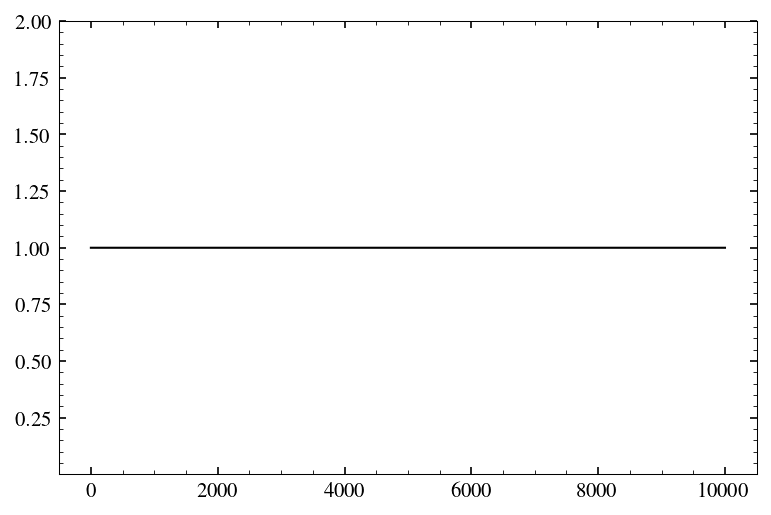

In [119]:
plot(dummy_delta_cl_arr[0]/dummy_delta_cl_arr[1])
print(dummy_delta_cl_arr[0], dummy_delta_cl_arr[1], dummy_delta_cl_arr[0]/dummy_delta_cl_arr[1])
ylim(1e-3, 2.)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


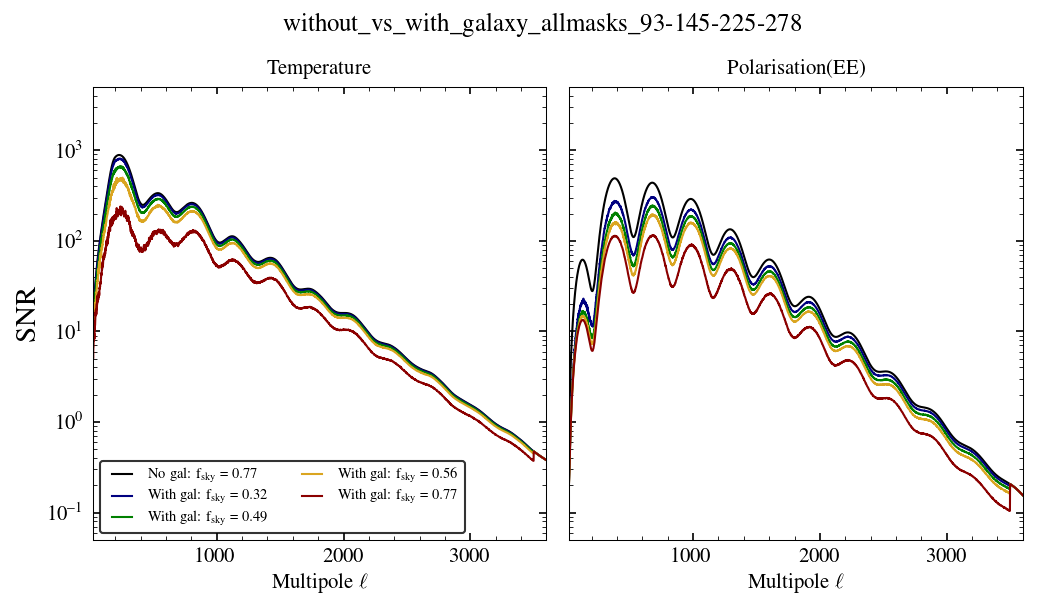

In [121]:
#now get SNR for TT and EE
dummy_delta_cl_arr = []
for snr_iter in range(1):
    logscale = 0
    fig = figure(figsize=(8., 4.))
    subplots_adjust(wspace=0.05)
    for fcntr, fname in enumerate( flist ):
    #for fcntr, fname in enumerate( [flist[0], flist[4]] ):
        for tpcntr, TP in enumerate(TParr):
            if logscale:
                ax = subplot(1,2,tpcntr+1, yscale = 'log', xscale = 'log')
            else:
                ax = subplot(1,2,tpcntr+1, yscale = 'log')#, xscale = 'log')
            el, cl_res, fsky = dic_for_snr[fname][TP]

            if fname.find('galaxy0')>-1:
                lab = 'No gal'
            else:
                lab = 'With gal'
            lab = r'%s: f$_{\rm sky}=%.2f$' %(lab, fsky)
            
            if TP == 'T':
                tit = r'Temperature'
                el_signal, cl_signal = el_camb, cl_TT
            else:
                tit = r'Polarisation(EE)'
                el_signal, cl_signal = el_camb, cl_EE
            el_noise, cl_noise = el, cl_res
            
            cl_signal_ip = np.interp(el_noise, el_signal, cl_signal)
            
            if snr_iter == 0:
                delta_cl = np.copy(cl_noise)
                snr_arr =  cl_signal_ip / delta_cl
                plot(el_noise, snr_arr, label = lab, color = colorarr[fcntr])
                ylim(5e-2, 5e3)
            else:
                delta_cl = misc.get_delta_cl(el_noise, cl_signal_ip, cl_noise, fsky = fsky)

                if tpcntr == 0: 
                    print(fname, fsky, delta_cl[10:15])
                    dummy_delta_cl_arr.append(delta_cl)

                snr_arr =  cl_signal_ip / delta_cl
                plot(el_noise, delta_cl, lw = 0.1, label = lab, color = colorarr[fcntr])
                #ylim(5e-2, 5e3)
                '''
                if fcntr == 0:
                    plot(el_noise, cl_signal_ip, label = lab, color = colorarr[fcntr])
                fill_between(el_noise, cl_signal_ip - delta_cl, cl_signal_ip + delta_cl, \
                             color = colorarr[fcntr])#, alpha = 0.1)
                ylim(1e-8, 5e3)
                '''

            if tpcntr == 0:
                legend(loc = 3, fancybox = 1, ncol = 2, fontsize = 7)
            xlim(20, 3600); 
            xlabel(r'Multipole $\ell$')
            if tpcntr == 0:
                ylabel(r'SNR', fontsize = 14)
            else:
                setp(ax.get_yticklabels(which = 'both'), visible=False)
            title(tit, fontsize = 10)
    if snr_iter == 0:
        titextrastr = r'No cosmic variance'
        plnameextrastr = 'nocosmicvariance'
    else:
        titextrastr = r'With cosmic variance'
        plnameextrastr = 'withcosmicvariance'
    suptitle(r'%s' %(plname_str.replace('_','\_')), y = 1.)
    if logscale:
        savefig('reports/galactic_sims/ILC_analysis/snr_%s_%s_logscale.pdf' %(plnameextrastr, plname_str))
    else:
        savefig('reports/galactic_sims/ILC_analysis/snr_%s_%s.pdf' %(plnameextrastr, plname_str))    